<div style="text-align:center;">
    <h1 style="font-size: 50px; margin: 0px; margin-bottom: 5px;">Main Sequence Lifetime Plot</h1>
    <h2 style="margin:0px; margin-bottom: 5px;">COMPAS methods paper Figure 7</h2>
    <p style="text-align:center;">A notebook for reproducing the main sequence lifetime plot in the COMPAS methods paper.</p>
</div>

<img src="https://compas.science/images/COMPAS_CasA.png" style="width:50%; display:block; margin:auto; margin-bottom:20px">

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import astropy.constants as consts
import matplotlib
import astropy.units as u

In [2]:
# make the plots pretty
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif')
fs = 24

params = {'legend.fontsize': fs,
         'axes.labelsize': fs,
         'xtick.labelsize':0.7*fs,
         'ytick.labelsize':0.7*fs}
plt.rcParams.update(params)

# Main sequence lifetime function
COMPAS uses fits from Hurley+2000 to calculate the main sequence lifetime of stars. Below is a function that calculates values for these fits.

In [3]:
def t_MS(m, Z):
    """ Get the main sequence lifetime of a star with mass m and metallicity Z using Hurley+2000 """
    
    def tBGB(m, Z):
        zeta = np.log10(Z / 0.02)

        a1 = 1.593890e3 + 2.053038e3 * zeta + 1.231226e3 * zeta**2 + 2.327785e2 * zeta**3
        a2 = 2.706708e3 + 1.483131e3 * zeta + 5.772723e2 * zeta**2 + 7.411230e1 * zeta**3
        a3 = 1.466143e2 - 1.048442e2 * zeta - 6.795374e1 * zeta**2 - 1.391127e1 * zeta**3
        a4 = 4.141960e-2 + 4.564888e-2 * zeta + 2.958542e-2 * zeta**2 + 5.571483e-3 * zeta**3
        a5 = 3.426349e-1
        return (a1 + a2 * m**4 + a3 * m**(5.5) + m**7) / (a4 * m**2 + a5 * m**7)
    
    def mu_t(m, Z):
        zeta = np.log10(Z / 0.02)

        a6 = 1.949814e1 + 1.758178e0 * zeta - 6.008212e0 * zeta**2 - 4.470533e0 * zeta**3
        a7 = 4.903830e0
        a8 = 5.212154e-2 + 3.166411e-2 * zeta - 2.750074e-3 * zeta**2 - 2.271549e-3 * zeta**3
        a9 = 1.312179e0 - 3.294936e-1 * zeta + 9.231860e-2 * zeta**2 + 2.610989e-2 * zeta**3
        a10 = 8.073972e-1

        return np.maximum(0.5, 1.0 - 0.01 * np.maximum(a6 / m**a7, a8 + a9 / m**a10))
    
    def x_t(Z):
        zeta = np.log10(Z / 0.02)
        return np.maximum(0.95, np.minimum(0.95 - 0.03 * (zeta + 0.30103), 0.99))
    
    tbgb = tBGB(m, Z)
    return np.maximum(mu_t(m, Z) * tbgb, x_t(Z) * tbgb)

# Recreate the plot

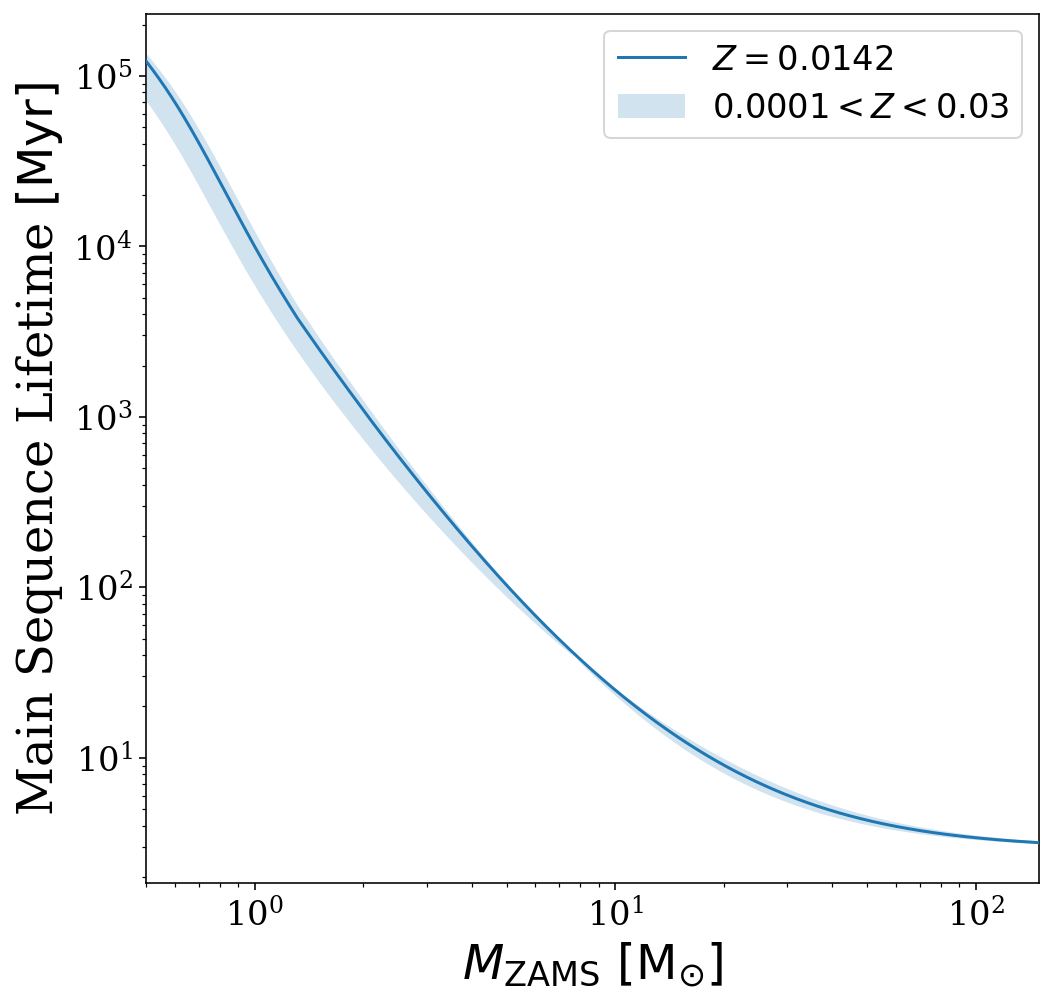

In [6]:
fig, ax = plt.subplots(1, figsize=(8, 8))

# define at which masses to evaluate
lifetime_masses = np.logspace(np.log10(0.5), np.log10(150), 1000)

# plot the lifetime for solar metallicities stars
ax.loglog(lifetime_masses, t_MS(lifetime_masses, 0.01416), label=r"$Z = 0.0142$", zorder=4)

# fill an area for the range of COMPAS metallicities
ax.fill_between(lifetime_masses, t_MS(lifetime_masses, 1e-4), t_MS(lifetime_masses, 0.03), alpha=0.2, label=r"$0.0001 < Z < 0.03$", zorder=3)

ax.legend(fontsize=0.7*fs)

ax.set_xlabel(r"$M_{\rm ZAMS} \ [\rm M_{\odot}]$")
ax.set_ylabel(r"Main Sequence Lifetime $[\rm Myr]$")

ax.set_xlim(np.min(lifetime_masses), np.max(lifetime_masses))

plt.savefig("main_sequence_lifetime.pdf", format="pdf", bbox_inches="tight")

plt.show()